# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
df=sinasc_raw.copy()

In [7]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# Criar as faixas de latitude
faixas_latitude = pd.cut(df['munResLat'], bins=[float('-inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Aplicar o groupby e realizar as operações desejadas
resultados = df.groupby(faixas_latitude).agg({'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                              'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
resultados

QTDFILMORT                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317   
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     5800.0  0.452242  0.0  41.0    0.0  1.123426  1.262087  
Acima de -10.5      8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:

# Criar as faixas de área
faixas_area = pd.cut(df['munResArea'], bins=[float('-inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

# Aplicar o groupby e realizar as operações desejadas
resultados = df.groupby(faixas_area).agg({'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                          'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


resultados

QTDFILMORT                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838   
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743   

               QTDPARTNOR                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
Abaixo de 3000     1912.0  0.371334  0.0  10.0    0.0  0.856441  0.733490  
Acima de 3000     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
# Crie as faixas na variável munResAlt usando qcut
faixas_altitude = pd.qcut(df['munResAlt'], q=3, labels=['Baixa', 'Média', 'Alta'])

# Aplique o groupby e calcule as estatísticas desejadas para as variáveis numéricas
resultados = df.groupby(faixas_altitude).agg({'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                              'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


In [13]:
resultados

QTDFILMORT                                                  \
                 sum      mean  min   max median       std       var   
munResAlt                                                              
Baixa         2357.0  0.307261  0.0   9.0    0.0  0.638486  0.407664   
Média         2381.0  0.258103  0.0   9.0    0.0  0.592529  0.351090   
Alta          1905.0  0.237147  0.0  28.0    0.0  0.612091  0.374656   

          QTDPARTNOR                                                  
                 sum      mean  min   max median       std       var  
munResAlt                                                             
Baixa         6271.0  0.802534  0.0  40.0    0.0  1.377551  1.897646  
Média         5336.0  0.574319  0.0  14.0    0.0  1.139346  1.298109  
Alta          2964.0  0.368519  0.0  41.0    0.0  1.065716  1.135751

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [39]:
df_ro=df.copy()

In [40]:
regioes_imediatas = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    "Machadinho D'Oeste": 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    "Alvorada D'Oeste": "Ji-Paraná",
    'Costa Marques': 'Ji-Paraná',
    "Ji-Paraná": 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    "Alta Floresta D'Oeste": 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
     "Espigão D'Oeste": 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    "Nova Brasilândia D'Oeste": 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    "Santa Luzia D'Oeste": 'Cacoal',
    "São Felipe D'Oeste": 'Cacoal',
    'Vilhena': 'Vilhena',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena'
}



In [41]:
df_ro = df_ro.set_index('munResNome')

In [42]:
df_ro.groupby(regioes_imediatas).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Ariquemes,3233,3219,3233,3233,3233,3180,3209,3094,2981,2769,...,3233,3233,3233,3233,3233,3233,3233,3233,3233,3233
Cacoal,4603,4595,4603,4603,4603,4568,4574,3870,4566,4553,...,4603,4603,4603,4603,4603,4603,4603,4603,4603,4603
Jaru,1683,1678,1683,1683,1683,1663,1668,1428,1659,1645,...,1683,1683,1683,1683,1683,1683,1683,1683,1683,1683
Ji-Paraná,4962,4954,4962,4962,4962,4895,4914,4540,4925,4911,...,4962,4962,4962,4962,4962,4962,4962,4962,4962,4962
Porto Velho,10096,10031,10096,10096,10096,9960,9913,8958,8886,8618,...,10096,10096,10096,10096,10096,10096,10096,10096,10096,10096
Vilhena,2450,2435,2450,2450,2450,2444,2437,2230,2437,2433,...,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450


In [43]:
result = df_ro.groupby(regioes_imediatas)['IDADEMAE'].mean()

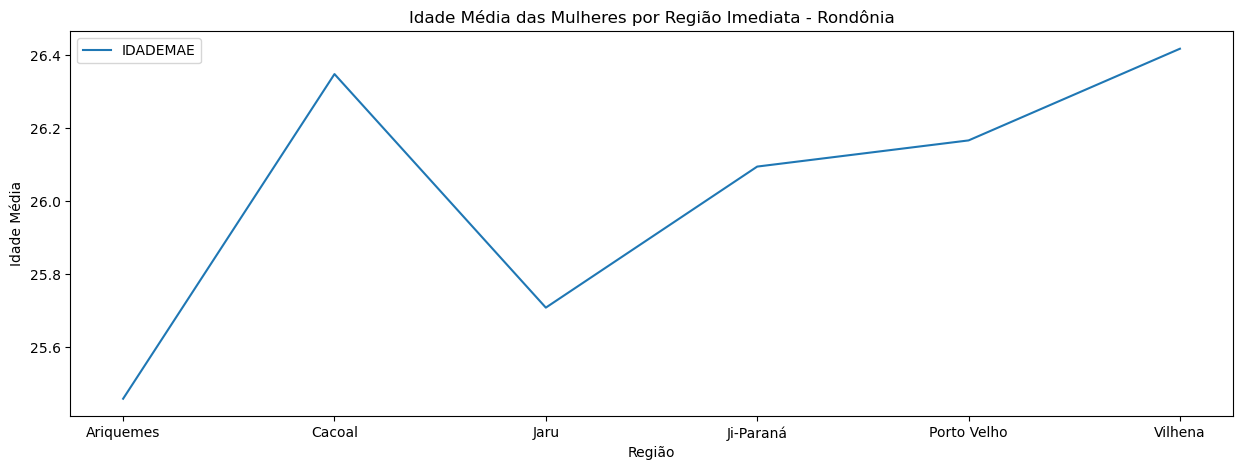

In [45]:
fig, ax = plt.subplots(figsize=[15,5])
result.plot()
plt.title('Idade Média das Mulheres por Região Imediata - Rondônia')
plt.xlabel('Região')
plt.ylabel('Idade Média')
plt.legend()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [59]:
mapping1 = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão d'Oeste": "IDH-M médio",
    "Santa Luzia d'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe d'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada d'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia d'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta d'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma" :  "IDH-M baixo",
     "Nova União" :  "IDH-M baixo",
     "Nova Mamoré" :  "IDH-M baixo",
     "Vale do Anari" :  "IDH-M baixo"}


In [60]:
df_ro.groupby(mapping1).mean()

C:\Users\cacat\AppData\Local\Temp\ipykernel_21920\4190385620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ro.groupby(mapping1).mean()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
IDH-M alto,1.0,3.310397e+06,111348.242539,1.008543,26.280332,2.550943,792048.701919,1.033960,0.272297,110017.123821,...,1.000000,1.0,4.364996,0.636369,5.034530,743050.460516,-10.020071,-62.753020,167.972530,20118.411971
IDH-M baixo,1.0,3.292691e+06,110037.509804,1.024133,25.269231,2.399390,784875.717500,1.056270,0.253521,110086.456259,...,1.000000,1.0,4.124434,0.659879,5.173454,735731.070136,-10.808059,-63.546314,205.746606,5521.906123
IDH-M médio,1.0,3.284165e+06,110639.770912,1.016643,25.848191,2.494302,814064.765049,1.093111,0.272386,110050.600724,...,0.999132,1.0,4.235601,0.660637,4.917221,718125.963097,-10.966425,-62.870497,184.767438,5913.175040


In [64]:
df_ro.groupby(mapping1)['IDADEMAE'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
IDH-M alto,16855.0,26.280332,6.415374,12.0,21.0,26.0,31.0,47.0
IDH-M baixo,1326.0,25.269231,6.103193,13.0,20.0,25.0,29.0,46.0
IDH-M médio,6910.0,25.848191,6.372794,11.0,21.0,25.0,30.0,53.0


In [63]:
df_ro.groupby(mapping1)['ESCMAE'].describe()

,count,unique,top,freq
munResNome,,,,
IDH-M alto,16632,5,8 a 11 anos,9395
IDH-M baixo,1313,5,8 a 11 anos,868
IDH-M médio,6853,5,8 a 11 anos,4268


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [58]:
mapping2 = {
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular"
}


In [66]:
df_ro.groupby(mapping2)['IDADEMAE'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Desenvolvimento moderado,21426.0,26.226921,6.388564,12.0,21.0,26.0,31.0,53.0
Desenvolvimento regular,3665.0,25.412005,6.376854,11.0,20.0,25.0,30.0,52.0


In [67]:
df_ro.groupby(mapping2)['ESCMAE'].describe()

,count,unique,top,freq
munResNome,,,,
Desenvolvimento moderado,21161,5,8 a 11 anos,12223
Desenvolvimento regular,3637,5,8 a 11 anos,2308


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [68]:
mapping3 = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 100 Milhões",
    "Vilhena": "Acima de 100 Milhões",
    "Ariquemes": "Acima de 100 Milhões",
    "Cacoal": "Acima de 100 Milhões",
    "Jaru": "Acima de 100 Milhões",
    "Rolim de Moura": "Acima de 100 Milhões",
    "Pimenta Bueno": "Acima de 100 Milhões",
    "Guajará-Mirim": "Acima de 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 100 Milhões",
    "Buritis": "Acima de 100 Milhões",
    "Machadinho do Oeste": "Acima de 100 Milhões",
    "Espigão d'Oeste": "Acima de 100 Milhões",
    "São Miguel do Guaporé": "Acima de 100 Milhões",
    "Candeias do Jamari": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 100 Milhões",
    "Alta Floresta do Oeste": "Acima de 100 Milhões",
    "Presidente Médici": "Acima de 100 Milhões",
    "Cujubim": "Acima de 100 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 100 Milhões",
    "Alto Paraíso": "Acima de 100 Milhões",
    "São Francisco do Guaporé": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 100 Milhões",
    "Monte Negro": "Acima de 100 Milhões",
    "Alto Alegre dos Parecis": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 100 Milhões",
    "Alvorada do Oeste": "Acima de 100 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Acima de 100 Milhões",
    "Parecis": "Acima de 100 Milhões",
    "Rio Crespo": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Acima de 100 Milhões",
    "Teixeirópolis": "Acima de 100 Milhões",
    "São Felipe do Oeste": "Acima de 100 Milhões",
    "Castanheiras": "Acima de 100 Milhões",
    "Primavera de Rondônia": "Acima de 100 Milhões"
}


In [69]:
df_ro.groupby(mapping3)['IDADEMAE'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Acima de 1 Bilhão,8437.0,26.312670,6.549074,12.0,21.0,26.0,31.0,47.0
Acima de 100 Milhões,16654.0,26.004143,6.310443,11.0,21.0,25.0,30.0,53.0


In [70]:
df_ro.groupby(mapping3)['ESCMAE'].describe()

,count,unique,top,freq
munResNome,,,,
Acima de 1 Bilhão,8268,5,8 a 11 anos,4421
Acima de 100 Milhões,16530,5,8 a 11 anos,10110


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Parece haver uma ligeira associação entre o nível de desenvolvimento socioeconômico dos municípios e a idade materna média. Municípios com melhores indicadores socioeconômicos, como IDH-M alto, desenvolvimento moderado ou PIB mais elevado, tendem a ter uma idade materna ligeiramente mais alta. 